<a href="https://colab.research.google.com/github/dataexpert-moon/class_ai4dl/blob/demo-repo/week2/%EB%94%A5%EB%9F%AC%EB%8B%9D_2%EC%A3%BC%EC%B0%A8_%EC%97%B0%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from tensorflow.keras.datasets import mnist # 데이터 불러오기
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


In [ ]:
# 1. We normalized data by dividing 255. What happens if we do not normalize?
# 데이터 값들의 범위가 다르면 training 시킬 수 없다.

# 2. Try modifying other options.


In [10]:
#1. How many samples in Mnist test dataset? 
test_images.shape # 10000개

(10000, 28, 28)

In [11]:
#2.What is dimension for each data? (test_images[0])
# 2차원 (28 x 28)

In [12]:
#3. Create a 3D tensor object. (with any values you like) 
import numpy as np

x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

3

(28, 28)


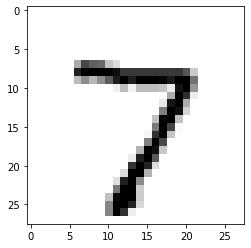

In [15]:
#4. Try to visualize the 1st digit from mnist test dataset (1 st digit data = test_images[0] )
#5. - Try to manipulate and visualize the 1st digit data

import matplotlib.pyplot as plt
digit = test_images[0]
print(test_images[0].shape)
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [17]:
# 1. Try to use naïve version of relu and add functions
import numpy as np

def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print("Took: {0:.2f} s".format(time.time() - t0))


t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("Took: {0:.2f} s".format(time.time() - t0))


Took: 0.01 s
Took: 2.19 s


In [ ]:
# 2. Why we use x.copy()?

# copy를 하지 않으면 x값이 바뀌지 않는다.
# 파이썬은 R과 다르게 x = y이면, y가 바뀌면 x도 같이 바뀐다.
# 이를 막기 위해 x.copy()를 사용해야한다.

# 3. why the naïve version of the code slower?
# for 구문으로 인해 시간복잡도 O(n^3)가 되므로 느려진다. 